# Final Analysis

### Pulling in the data

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#import the csv files
weather = pd.read_csv("../seattle-weather.csv")

weather["date"] = pd.to_datetime(weather["date"])

#convert weather field into numerical values
weather_mapping = {'drizzle': 0, 'rain': 1, 'sun': 2, 'snow': 3, 'fog': 4}
weather["weather"] = weather["weather"].map(weather_mapping)

#adding previous days temp
weather['prev_temp_min'] = weather['temp_min'].shift(1)
weather['prev_temp_max'] = weather['temp_max'].shift(1)



weather = weather.drop(columns=["date"])
weather = weather.dropna()

X = weather[["temp_max","temp_min","precipitation","wind","prev_temp_min"]]
X = weather[["temp_max","precipitation","wind","prev_temp_max"]]

Y = weather["weather"]

### Spliting into training data

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
train_set, test_set = train_test_split(weather,test_size=0.2,random_state=123)
reg = ElasticNet(alpha = 1.0, l1_ratio=0.5)

use = ["temp_max","temp_min","precipitation","wind","prev_temp_min","prev_temp_max"]
#use = ["temp_max","wind", "precipitation"]
find = ["weather"]
X_train = train_set[use]
y_train = train_set[find]

X_test = test_set[use]
y_test = test_set[find]



### Decision Tree Classifier

In [3]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)

Y_pred_train = tree_classifier.predict(X_train)

cm = confusion_matrix(y_train, Y_pred_train)
print("Training set")
print(cm)

Y_pred_test = tree_classifier.predict(X_test)
cm = confusion_matrix(y_test, Y_pred_test)

print("Training set")
print(cm)
print ("Accuracy is ", accuracy_score(y_test, Y_pred_test))
print ("Precision is ", precision_score(y_test, Y_pred_test, average="weighted"))
print ("Sensitivity is ", recall_score(y_test, Y_pred_test, average="weighted"))
print ("F1 is ", f1_score(y_test, Y_pred_test, average="weighted"))

Training set
[[ 41   0   0   0   0]
 [  0 519   0   0   0]
 [  0   0 506   0   0]
 [  0   0   0  19   0]
 [  0   0   0   0  83]]
Training set
[[  1   0  10   0   0]
 [  0 110   6   5   1]
 [  4   5 111   0  14]
 [  0   2   0   5   0]
 [  3   1  11   0   3]]
Accuracy is  0.7876712328767124
Precision is  0.7855699392293637
Sensitivity is  0.7876712328767124
F1 is  0.7858785006432277


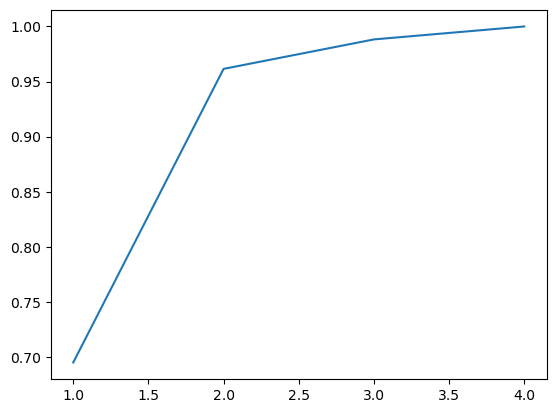

In [4]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
cumulative_sums = np.cumsum(pca.explained_variance_ratio_)

import matplotlib.pyplot as plt
d_values = [i+1 for i in range(0,len(cumulative_sums))]
plt.plot(d_values, cumulative_sums)
plt.show()



This graph looks weird when compared to the one in the example you provided. That one took ~100 while this one took 2.


In [5]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

MNIST_pca = PCA(n_components=3)
MNIST_model = SVC(random_state = 29, max_iter=500, tol=0.1)

myPipe = Pipeline([
    ('pca', MNIST_pca),
    ('svc', MNIST_model)
])

print(myPipe)
myPipe.fit(X_train, y_train)



Pipeline(steps=[('pca', PCA(n_components=3)),
                ('svc', SVC(max_iter=500, random_state=29, tol=0.1))])


C:\Users\s553982\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('pca', PCA(n_components=3)),
                ('svc', SVC(max_iter=500, random_state=29, tol=0.1))])

In [6]:
from sklearn.metrics import confusion_matrix
y_predicted = myPipe.predict(X_train)
matrix = confusion_matrix(y_train, y_predicted)
print(matrix)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print ("Accuracy is ", accuracy_score(y_train, y_predicted))

# We have to specify how to combine for the multiclassifications
print ("Precision is ", precision_score(y_train, y_predicted, average="weighted"))
print ("Sensitivity is ", recall_score(y_train, y_predicted, average="weighted"))
print ("F1 is ", f1_score(y_train, y_predicted, average="weighted"))

y_predicted = myPipe.predict(X_test)
matrix = confusion_matrix(y_test, y_predicted)
print(matrix)
print ("Accuracy is ", accuracy_score(y_test, y_predicted))

# We have to specify how to combine for the multiclassifications
print ("Precision is ", precision_score(y_test, y_predicted, average="weighted"))
print ("Sensitivity is ", recall_score(y_test, y_predicted, average="weighted"))
print ("F1 is ", f1_score(y_test, y_predicted, average="weighted"))



[[  0   1  40   0   0]
 [  0 415 104   0   0]
 [  0  15 491   0   0]
 [  0  13   4   2   0]
 [  0   1  82   0   0]]
Accuracy is  0.7773972602739726
Precision is  0.7256819641712371
Sensitivity is  0.7773972602739726
F1 is  0.7323979873863876
[[  0   0  11   0   0]
 [  0  86  36   0   0]
 [  0   3 131   0   0]
 [  0   6   0   1   0]
 [  0   1  17   0   0]]
Accuracy is  0.7465753424657534
Precision is  0.706548559887601
Sensitivity is  0.7465753424657534
F1 is  0.7010894758032632


C:\Users\s553982\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\s553982\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(
    solver='adam', 
    activation='logistic', 
    alpha=1e-5, 
    hidden_layer_sizes=(200,200),
    random_state=1,max_iter=500)

use = ["temp_max","temp_min","precipitation","wind","prev_temp_min","prev_temp_max"]
#use = ["temp_max","temp_min","wind", "precipitation"]
find = ["weather"]

X_train = train_set[use]
y_train = train_set[find]

X_test = test_set[use]
y_test = test_set[find]

model.fit(X_train, y_train)



C:\Users\s553982\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=(200, 200),
              max_iter=500, random_state=1)

In [8]:
y_predicted = model.predict(X_train)
matrix = confusion_matrix(y_train, y_predicted)
print(matrix)
print ("Accuracy is ", accuracy_score(y_train, y_predicted))
print ("Precision is ", precision_score(y_train, y_predicted, average="weighted"))
print ("Sensitivity is ", recall_score(y_train, y_predicted, average="weighted"))
print ("F1 is ", f1_score(y_train, y_predicted, average="weighted"))

print()

y_predicted = model.predict(X_test)
matrix = confusion_matrix(y_test, y_predicted)
print(matrix)
print ("Accuracy is ", accuracy_score(y_test, y_predicted))
print ("Precision is ", precision_score(y_test, y_predicted, average="weighted"))
print ("Sensitivity is ", recall_score(y_test, y_predicted, average="weighted"))
print ("F1 is ", f1_score(y_test, y_predicted, average="weighted"))

[[  0   0  41   0   0]
 [  0 480  35   3   1]
 [  0   1 501   0   4]
 [  0   7   0  12   0]
 [  0   0  83   0   0]]
Accuracy is  0.8501712328767124
Precision is  0.7789313384235348
Sensitivity is  0.8501712328767124
F1 is  0.8073788676684641

[[  0   0  11   0   0]
 [  0 113   7   2   0]
 [  0   1 133   0   0]
 [  0   2   0   5   0]
 [  0   0  18   0   0]]
Accuracy is  0.8595890410958904
Precision is  0.7852755098903494
Sensitivity is  0.8595890410958904
F1 is  0.8167318602471505


C:\Users\s553982\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\s553982\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
import numpy as np

X = weather[["temp_max","temp_min","precipitation","wind"]]
Y = weather["weather"]

z_scores = np.abs((X - X.mean()) / X.std())
threshold = 3
outliers = np.where(z_scores > threshold)
print("Indices of outliers:", outliers)


Indices of outliers: (array([  19,   27,   47,   73,   87,  119,  299,  302,  322,  326,  333,
        350,  373,  417,  443,  461,  612,  635,  670,  675,  686,  699,
        705,  740,  741,  776,  776,  793,  796,  804,  852, 1024, 1032,
       1044, 1045, 1061, 1111, 1130, 1132, 1168, 1320, 1335, 1377, 1398,
       1399, 1411, 1412, 1415, 1415, 1435, 1436, 1449, 1451], dtype=int64), array([3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3,
       1, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 3], dtype=int64))


In [10]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(
    solver='adam', 
    activation='logistic', 
    alpha=1e-5, 
    hidden_layer_sizes=(200,200),
    random_state=1,max_iter=500)

train_set = train_set[(train_set['weather'] != 0) & (train_set['weather'] != 4)]
test_set = test_set[(test_set['weather'] != 0) & (test_set['weather'] != 4)]

use = ["temp_max","temp_min","wind", "precipitation"]
find = ["weather"]
X_train = train_set[use]
y_train = train_set[find]

X_test = test_set[use]
y_test = test_set[find]

model.fit(X_train, y_train)



C:\Users\s553982\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=(200, 200),
              max_iter=500, random_state=1)

In [11]:
y_predicted = model.predict(X_train)
matrix = confusion_matrix(y_train, y_predicted)
print(matrix)
print ("Accuracy is ", accuracy_score(y_train, y_predicted))
print ("Precision is ", precision_score(y_train, y_predicted, average="weighted"))
print ("Sensitivity is ", recall_score(y_train, y_predicted, average="weighted"))
print ("F1 is ", f1_score(y_train, y_predicted, average="weighted"))

print()

y_predicted = model.predict(X_test)
matrix = confusion_matrix(y_test, y_predicted)
print(matrix)
print ("Accuracy is ", accuracy_score(y_test, y_predicted))
print ("Precision is ", precision_score(y_test, y_predicted, average="weighted"))
print ("Sensitivity is ", recall_score(y_test, y_predicted, average="weighted"))
print ("F1 is ", f1_score(y_test, y_predicted, average="weighted"))

[[482  35   2]
 [  6 500   0]
 [  9   0  10]]
Accuracy is  0.9501915708812261
Precision is  0.9502553119651294
Sensitivity is  0.9501915708812261
F1 is  0.9490097297747716

[[113   7   2]
 [  0 134   0]
 [  2   0   5]]
Accuracy is  0.9581749049429658
Precision is  0.9590333787074589
Sensitivity is  0.9581749049429658
F1 is  0.9578959834665663
